In [2]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 479.2 kB/s eta 0:13:04
   ---------------------------------------- 0.5/376.0 MB 479.2 kB/s eta 0:13:04
   ---------------------------------------- 0.8/376.0 MB 479.2 kB/s eta 0:13:03
   ---------------------------------------- 0.8/376.0 MB 479.2 kB/s eta 0:13:03
   ---------------------------------------- 1.0/376.0 MB 513.3 kB/s eta 0:12:11
   ---------------------------------------- 1.0/376.0 MB 513.3 kB/s eta 0:12:11
   --------------------

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
x_train = x_train.reshape (-1, 28, 28, 1 )
x_test = x_test.reshape (-1, 28, 28, 1)

In [19]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [24]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy", 
    metrics =["accuracy"]
)

In [25]:
model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7650 - loss: 0.6415 - val_accuracy: 0.8723 - val_loss: 0.3456
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8859 - loss: 0.3085 - val_accuracy: 0.8870 - val_loss: 0.3066
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9053 - loss: 0.2530 - val_accuracy: 0.8919 - val_loss: 0.2969
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9192 - loss: 0.2186 - val_accuracy: 0.9057 - val_loss: 0.2611
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9284 - loss: 0.1927 - val_accuracy: 0.9029 - val_loss: 0.2700
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9376 - loss: 0.1665 - val_accuracy: 0.9106 - val_loss: 0.2660
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9453 - loss: 0.1486 - val_accuracy: 0.9137 - val_loss: 0.2521
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9503 - lo

In [26]:
num_samples = 2
sample_images = x_test[:num_samples]
sample_labels = y_test[:num_samples]

predictions = model.predict(sample_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


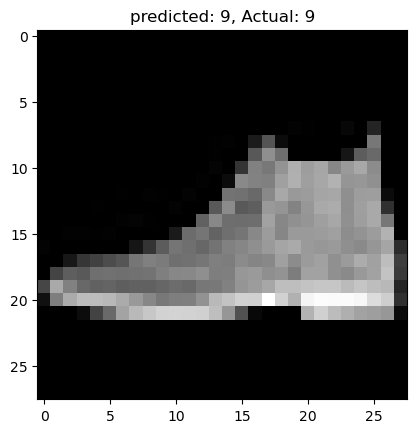

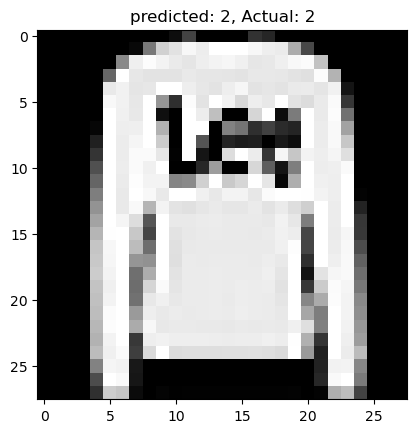

In [27]:
for i in range(num_samples):
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"predicted: {np.argmax(predictions[i])}, Actual: {sample_labels[i]}")
    plt.show()